<a href="https://colab.research.google.com/github/Jagroop2001/PyTorch-Learning/blob/master/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

In [1]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting model to data (training)",
    4: "making preductuins and evaluting a model (inference)",
    5: "save and load a model",
    6: "putting it all togeather"
}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building for neural networks
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu118'

## 1. Data (Preparing and Loading)


Data can be almost anything.

- Excel Spreadsheet
- Images of any kind
- Videos (Youtube has lot's of data ..)
- Audio like songs and postcasts
- DNA
- Text

In [3]:
weight  = 0.7
bias  = 0.3

start=0
end =1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

## Spliting Data into training and test set

In [5]:
# Create a train/test split
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split] , y[:train_split]
X_test, y_test = X[train_split:],X[train_split:]

len(X_train), len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

## Data Visualization

In [6]:
def plot_predictions(train_data=X_train,train_labels=y_train,
                     test_data=X_test,test_labels=y_test,predictions=None):
  """
  Plots Training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")

  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4, label="Predictions")

  plt.legend()

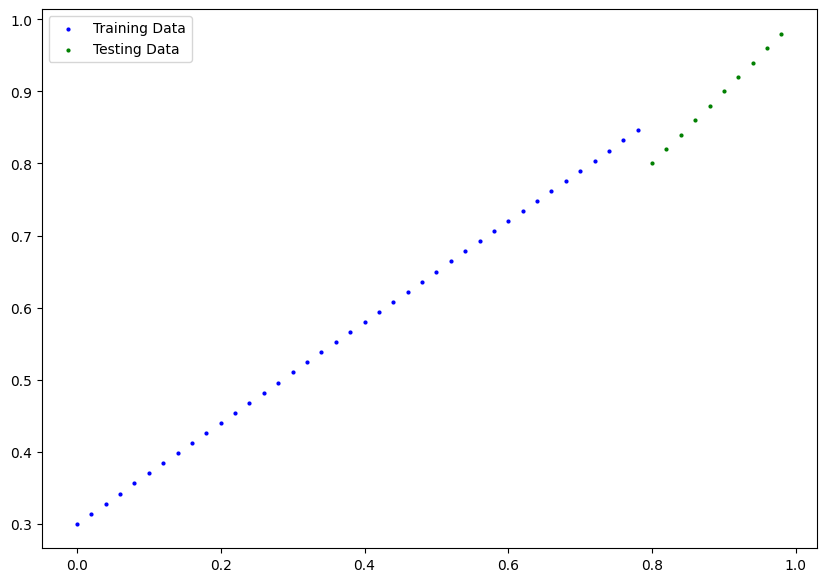

In [7]:
plot_predictions()

## 2. Build model

In [8]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [9]:
# Creating a random seed :
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
## Make predictions

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

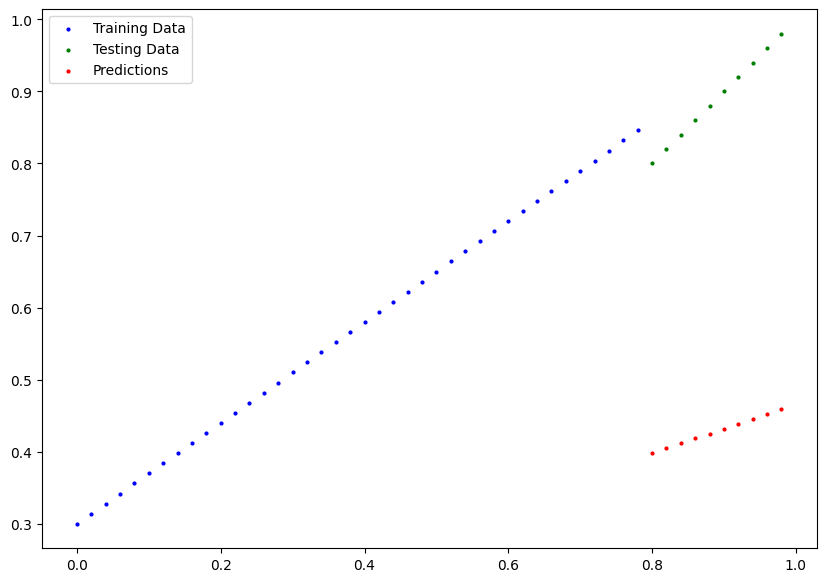

In [14]:
plot_predictions(predictions=y_preds)

# Train model

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

## Building a training loop and testing loop in PyTorch

1. Loop through data
2. Forward pass ( this involves data moving through our model's `forward()` functions) - also called forward propagation.

3. Calculate the loss ( compare forward pass predictions to ground truth labels)

4. Optimize zero grad

5. Loss backward

6. Optimizer step

In [17]:
# An epoch is one loop through the data
epochs = 140

epoch_count = []
loss_values = []
test_loss_values = []

# Loop throught the data

for epoch in range(epochs):
  model_0.train()

  # forward pass
  y_pred = model_0(X_train)

  # calculate loss
  loss = loss_fn(y_pred,y_train)

  #optimizer
  optimizer.zero_grad()

  # perform back propagration
  loss.backward()

  # Step the optimizer
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10  ==0:
      print(f"Epoch: {epoch} | Loss : {loss} | Test Loss :{test_loss}")
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(loss)
      print(model_0.state_dict())


Epoch: 0 | Loss : 0.31288138031959534 | Test Loss :0.4480651915073395
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss : 0.1976713240146637 | Test Loss :0.3133552074432373
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss : 0.08908725529909134 | Test Loss :0.18429657816886902
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss : 0.053148526698350906 | Test Loss :0.11164019256830215
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss : 0.04543796554207802 | Test Loss :0.08060953766107559
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss : 0.04167863354086876 | Test Loss :0.06619948148727417
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss : 0.03818932920694351 | Test Loss :0.05586633086204529
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6467])), ('bias', tensor([0.3223]))])

In [19]:
import numpy as np

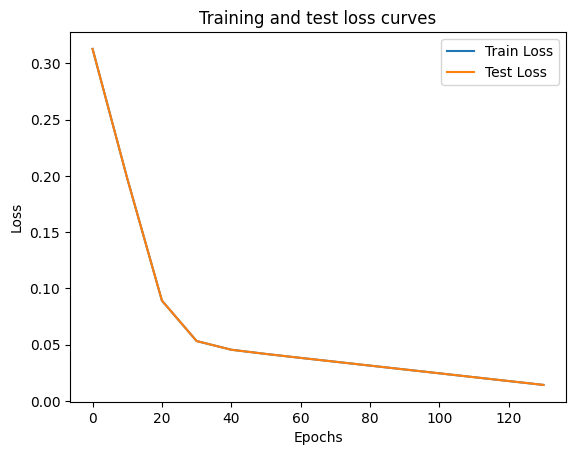

In [20]:
##  Plot loss curve
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label='Train Loss')
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()), label='Test Loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [21]:
with torch.inference_mode():
  y_preds_new  = model_0(X_test)

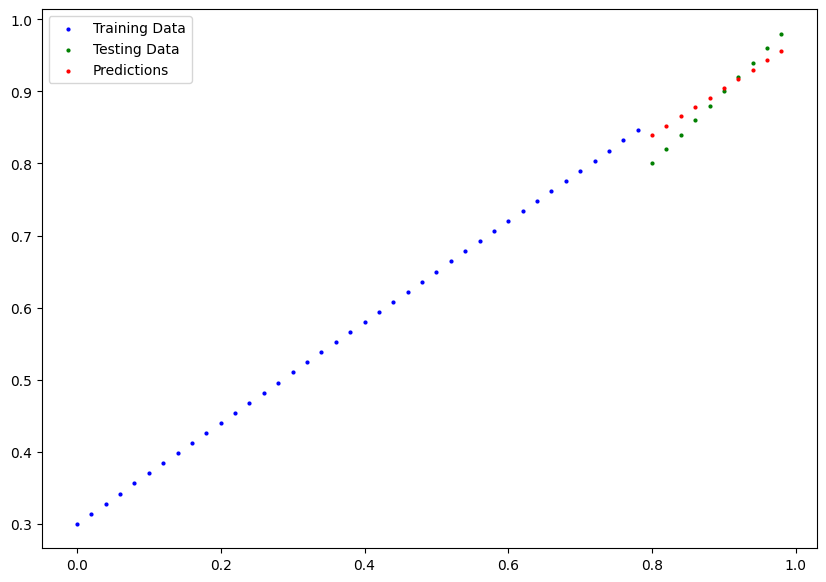

In [22]:
plot_predictions(predictions=y_preds_new)

## Save model's in Pytorch

- `torch.save()`
- `torch.load()`
- `torch.nn.Module.load_state_dict()`

In [23]:
from pathlib import Path

# Create model directory :
MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


# Create Model Save PAth
MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# Save the model State dict
torch.save(obj=model_0.state_dict(),
           f= MODEL_SAVE_PATH)

## Loding Pytorch Model

In [26]:
loaded_model_0 =  LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6467])), ('bias', tensor([0.3223]))])

In [29]:
# Make some prediction

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8396],
        [0.8526],
        [0.8655],
        [0.8784],
        [0.8914],
        [0.9043],
        [0.9172],
        [0.9302],
        [0.9431],
        [0.9560]])

In [30]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])